# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [7]:
# Question 2 part 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the csv file
df = pd.read_csv('/content/TMEDTREND_PUBLIC_241126.csv')
# Display the first few rows
df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7182616.0,7.493527e+06,2859483.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23699049.0,2.463142e+07,11945312.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680


Question 2 part 2

The data dictionary provides clear definitions and descriptions for various variables in the Medicare Telehealth Trends dataset, but it lacks explicit documentation on how missing values are handled for most variables. For categorical variables, some include defined classifications, such as Bene_Race_Desc and Bene_Mdcr_Entlmt_Stus, but they do not specify missing value codes. An exception is Bene_Geo_Desc (Geography Description), which explicitly states that if a beneficiary’s state of residence is unknown, they are assigned to a "Missing Data" category. However, for most categorical variables, it is unclear whether missing values exist and how they are recorded. Similarly, the dictionary does not explain how missing values are treated for numeric variables such as Total_Bene_TH_Elig, Total_PartB_Enrl, and Total_Bene_Telehealth. While some descriptions mention variations due to methodological differences in counting, they do not explicitly address how missing data is managed.

Question 2 part 3

A few interesting variables in the Medicare Telehealth Trends dataset are Bene_Geo_Desc (Geography Description), Bene_RUCA_Desc (Beneficiary Rural/Urban Status), and Total_Bene_Telehealth (Total Telehealth Users). These variables are particularly compelling when analyzed together because they provide insights into how telehealth adoption varies across geographic regions and rural versus urban settings. Bene_Geo_Desc categorizes beneficiaries based on their state of residence, allowing for regional comparisons, while Bene_RUCA_Desc differentiates between rural and urban populations using ZIP codes and commuting patterns. When combined with Total_Bene_Telehealth, which measures the number of unique Medicare beneficiaries using telehealth services, these variables can reveal disparities in telehealth accessibility.

In [8]:
# Question 2 part 3
# Select relevant variables
selected_vars = ['Bene_Geo_Desc', 'Bene_RUCA_Desc', 'Total_Bene_Telehealth']
df_selected = df[selected_vars].copy()

# Clean 'Bene_Geo_Desc' (Geography Description)
df_selected['Bene_Geo_Desc'] = df_selected['Bene_Geo_Desc'].replace('Missing Data', pd.NA)
df_selected['Bene_Geo_Desc'] = df_selected['Bene_Geo_Desc'].str.strip().str.title()

# Clean 'Bene_RUCA_Desc' (Rural/Urban Status)
df_selected['Bene_RUCA_Desc'] = df_selected['Bene_RUCA_Desc'].str.lower().str.strip()
df_selected['Bene_RUCA_Desc'] = df_selected['Bene_RUCA_Desc'].replace({'unknown': pd.NA, 'missing': pd.NA})

# Clean 'Total_Bene_Telehealth' (Total Telehealth Users)
df_selected['Total_Bene_Telehealth'] = pd.to_numeric(df_selected['Total_Bene_Telehealth'], errors='coerce')
df_selected = df_selected.dropna(subset=['Total_Bene_Telehealth'])

# Print unique values for the selected variables
unique_values = {
    "Bene_Geo_Desc": df_selected["Bene_Geo_Desc"].dropna().unique().tolist(),
    "Bene_RUCA_Desc": df_selected["Bene_RUCA_Desc"].dropna().unique().tolist(),
    "Total_Bene_Telehealth": df_selected["Total_Bene_Telehealth"].dropna().unique().tolist()
}

# Display unique values
for var, values in unique_values.items():
    print(f"Unique values for {var}:", values)



Unique values for Bene_Geo_Desc: ['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Territories', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Unique values for Bene_RUCA_Desc: ['all', 'rural', 'urban']
Unique values for Total_Bene_Telehealth: [14826919.0, 2859483.0, 11945312.0, 2322324.0, 6495728.0, 4133907.0, 1874960.0, 12371786.0, 2192809.0, 262324.0, 8625817.0, 6201102.0, 91026.0, 50485.0, 40243.

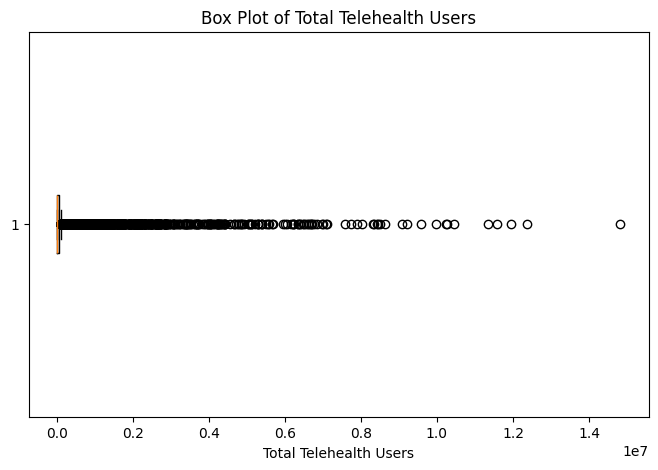

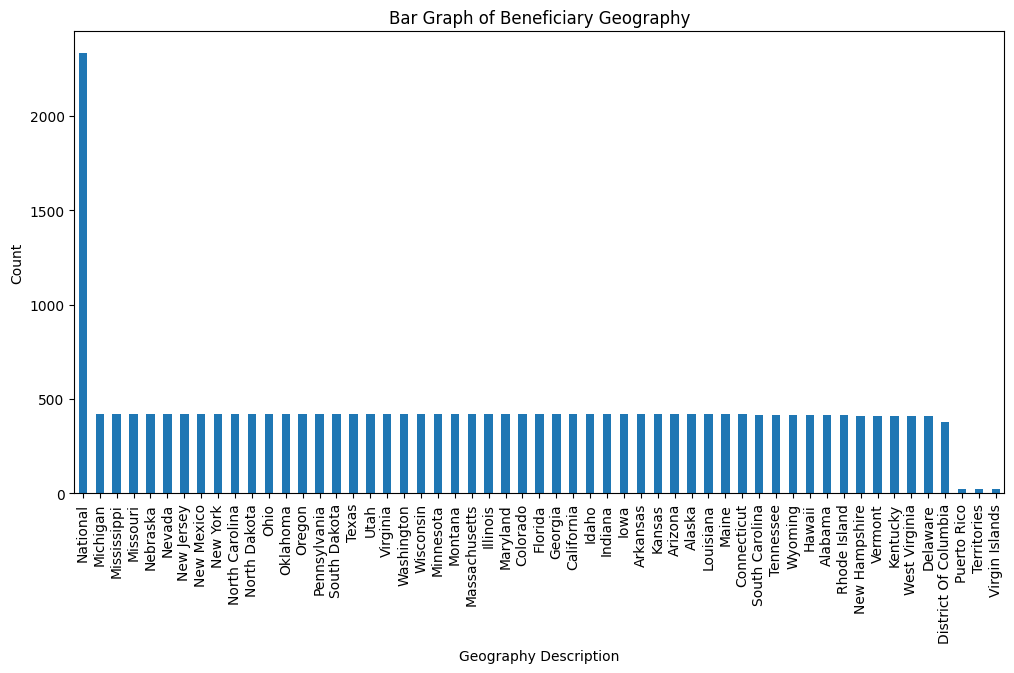

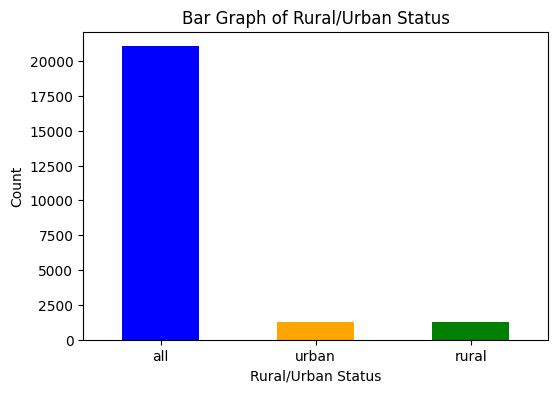

In [9]:
# Question 2 part 4
# Create a box plot for Total_Bene_Telehealth
plt.figure(figsize=(8, 5))
plt.boxplot(df_selected['Total_Bene_Telehealth'], vert=False)
plt.title('Box Plot of Total Telehealth Users')
plt.xlabel('Total Telehealth Users')
plt.show()
# From the boxplot, we can see that there are a lot of outliers.

# Create a bar plot for Bene_Geo_Desc (Geography Description)
plt.figure(figsize=(12, 6))
df_selected['Bene_Geo_Desc'].value_counts().plot(kind='bar')
plt.title('Bar Graph of Beneficiary Geography')
plt.xlabel('Geography Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot for Bene_RUCA_Desc (Rural/Urban Status)
plt.figure(figsize=(6, 4))
df_selected['Bene_RUCA_Desc'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Bar Graph of Rural/Urban Status')
plt.xlabel('Rural/Urban Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

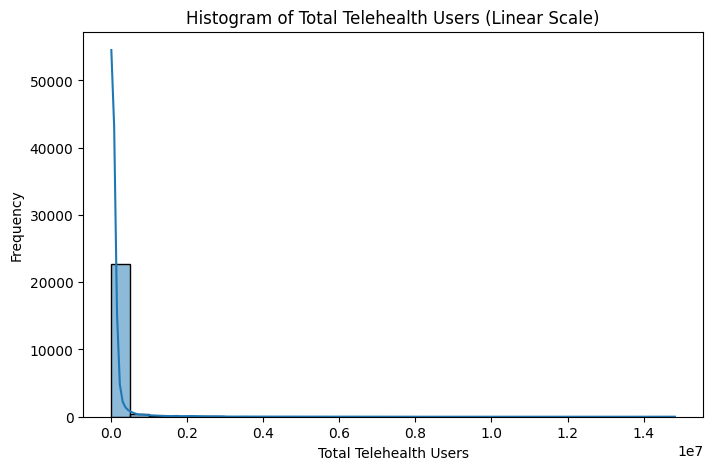

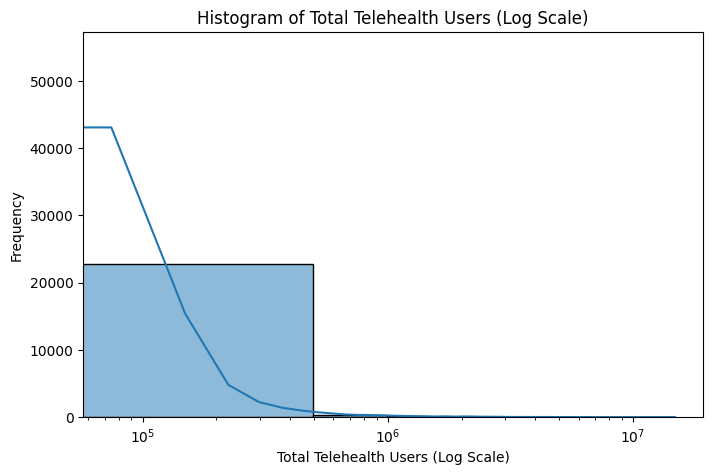

In [11]:
# Question 2 part 5
# Linear scale histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['Total_Bene_Telehealth'], bins=30, kde=True)
plt.title('Histogram of Total Telehealth Users (Linear Scale)')
plt.xlabel('Total Telehealth Users')
plt.ylabel('Frequency')
plt.show()

# The linear scale histogram shows extreme skewness
# So I switch to a log scaled histogram

# Log scale histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_selected['Total_Bene_Telehealth'], bins=30, kde=True)
plt.xscale('log')  # Apply log scale
plt.title('Histogram of Total Telehealth Users (Log Scale)')
plt.xlabel('Total Telehealth Users (Log Scale)')
plt.ylabel('Frequency')
plt.show()

# The log scale histogram makes the distribution much more readable.

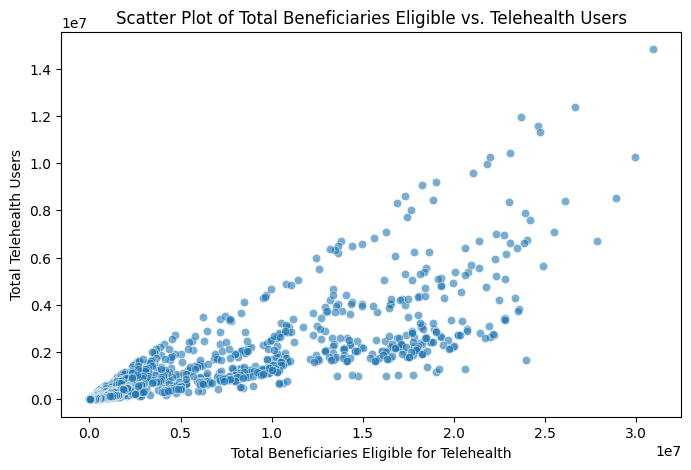

In [13]:
# Question 2 part 6
# Select relevant variables
selected_vars2 = ['Bene_Geo_Desc', 'Bene_RUCA_Desc', 'Total_Bene_TH_Elig', 'Total_Bene_Telehealth']
df_selected2 = df[selected_vars2].copy()

# Ensure numeric format and drop missing values
df_selected2['Total_Bene_TH_Elig'] = pd.to_numeric(df_selected2['Total_Bene_TH_Elig'], errors='coerce')
df_selected2['Total_Bene_Telehealth'] = pd.to_numeric(df_selected2['Total_Bene_Telehealth'], errors='coerce')
df_selected2 = df_selected2.dropna(subset=['Total_Bene_TH_Elig', 'Total_Bene_Telehealth'])

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_selected2['Total_Bene_TH_Elig'], y=df_selected2['Total_Bene_Telehealth'], alpha=0.6)
plt.title('Scatter Plot of Total Beneficiaries Eligible vs. Telehealth Users')
plt.xlabel('Total Beneficiaries Eligible for Telehealth')
plt.ylabel('Total Telehealth Users')
plt.show()

#The scatter plot shows a strong positive relationship between Total Beneficiaries Eligible for Telehealth and Total Telehealth Users.
#As the number of eligible beneficiaries increases, the number of telehealth users also increases.

In [15]:
# Question 2 part 7
# Generate a descriptive statistics summary for the selected variables
summary_table = df_selected2[['Total_Bene_TH_Elig', 'Total_Bene_Telehealth']].describe()

print(summary_table)


       Total_Bene_TH_Elig  Total_Bene_Telehealth
count        2.362600e+04           2.362600e+04
mean         5.079080e+05           1.104842e+05
std          2.083300e+06           5.141657e+05
min          1.100000e+01           0.000000e+00
25%          1.816825e+04           3.279250e+03
50%          7.942500e+04           1.333100e+04
75%          2.622980e+05           4.742825e+04
max          3.094678e+07           1.482692e+07


The summary table shows a right-skewed distribution for both Total Beneficiaries Eligible for Telehealth (Total_Bene_TH_Elig) and Total Telehealth Users (Total_Bene_Telehealth), with a few regions having extremely high values. The mean eligibility (507,908) is much higher than the median (79,425), suggesting that a small number of areas have a disproportionately large number of eligible beneficiaries. Similarly, while the mean telehealth users (110,484) is significant, many regions have far fewer, with the 25th percentile at just 3,279 users. The high standard deviations indicate substantial variability, and the presence of zeros suggests that some eligible beneficiaries do not use telehealth at all.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.